1.只有周租金，只留数字
2.有周租金、月租金，只取周租金

In [3]:
import numpy as np
import pandas as pd
import re

In [9]:
df = pd.read_csv('../data/raw/realestate.csv')

In [10]:
df.head()

,id,address,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,latitude,longitude
0,435045151,2109/33 MacKenzie St,Melbourne,3000,$560 per week,Apartment,2,1,0,0,N,-37.80768181,144.96683064
1,435045047,2108/11 Rose Lane,Melbourne,3000,$580 per week,Apartment,2,1,0,0,Y,-37.81545214,144.95408105
2,435144851,3210/9-23 Mackenzie Street,Melbourne,3000,$450 per week,Apartment,1,1,0,0,N,-37.80753655,144.96732789
3,435144711,300/668 Bourke Street,Melbourne,3000,$550 per week,Apartment,2,2,1,0,N,-37.8166019,144.95420038
4,435044255,2108/11 Rose Lane,Melbourne,3000,$600 per week,Apartment,2,1,0,0,Y,-37.81545214,144.95408105


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11143 entries, 0 to 11142
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             11143 non-null  int64 
 1   address        11095 non-null  object
 2   suburb         11143 non-null  object
 3   postcode       11143 non-null  int64 
 4   price          11143 non-null  object
 5   propertyType   11143 non-null  object
 6   bedrooms       11143 non-null  int64 
 7   bathrooms      11143 non-null  int64 
 8   parkingSpaces  11143 non-null  int64 
 9   studies        11143 non-null  int64 
 10  furnished      11143 non-null  object
 11  latitude       11143 non-null  object
 12  longitude      11143 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [12]:
df.shape

(11143, 13)

In [13]:
# check 'id' for dublicate data
df.duplicated('id').sum()

10

In [14]:
df.drop_duplicates('id',inplace=True)
df.shape

(11133, 13)

In [15]:
df.isnull().sum()

id                0
address          48
suburb            0
postcode          0
price             0
propertyType      0
bedrooms          0
bathrooms         0
parkingSpaces     0
studies           0
furnished         0
latitude          0
longitude         0
dtype: int64

In [16]:
# address - 48 items missing, remove
df = df.dropna()

In [17]:
df.shape

(11085, 13)

In [18]:
# latitude and longitude have missing values and shown by 'none'; remove
df = df.drop(df[(df['latitude']=='None')|(df['longitude']=='None')].index)
df.shape

(11001, 13)

In [19]:
# process with regular expressions 
def fun(txt):
    txt = txt.lower() #Change Uppercase to Lower case 
    txt = re.sub(' ','',txt) #remove spaces 
    txt = re.sub(',','',txt) #remove comma ','，some numbers like 1,200, the comma needs to be removed for matching
    txt = re.sub('\.(\d+)','',txt) #process price data, remove decimal places - 250.00-->250
    txt = re.sub('\.','',txt) #remove'.'，p.w. also refers to perweek
    res = re.findall('/w|p/?w|week',txt) # extract key words like perweek,/week,week,pw,/pw,p/w...
    
    # no matching string containing key words like perweek,/week... (not containing matching words)
    if len(res)==0: 
        return 0
    
    rent = re.findall('\$(\d+)',txt) #Extract the rental amount, which may contain both weekly and monthly rents, and return a matching string
    
    # if no matching string is returned, then there is no rent data in the certain price; fill it with zeros for now. （not containing rent data不含租金数据）
    if len(rent)==0:
        return 0
    
    # take the minimum value when having both weekly rent and monthly rent
    rent = [int(rent[i]) for i in range(len(rent))]
    return min(rent)

In [20]:
df['price'] = df['price'].apply(fun)
df['price'].describe()

count    11001.000000
mean       504.873557
std        285.516341
min          0.000000
25%        385.000000
50%        450.000000
75%        580.000000
max       6000.000000
Name: price, dtype: float64

(0.0, 2000.0)

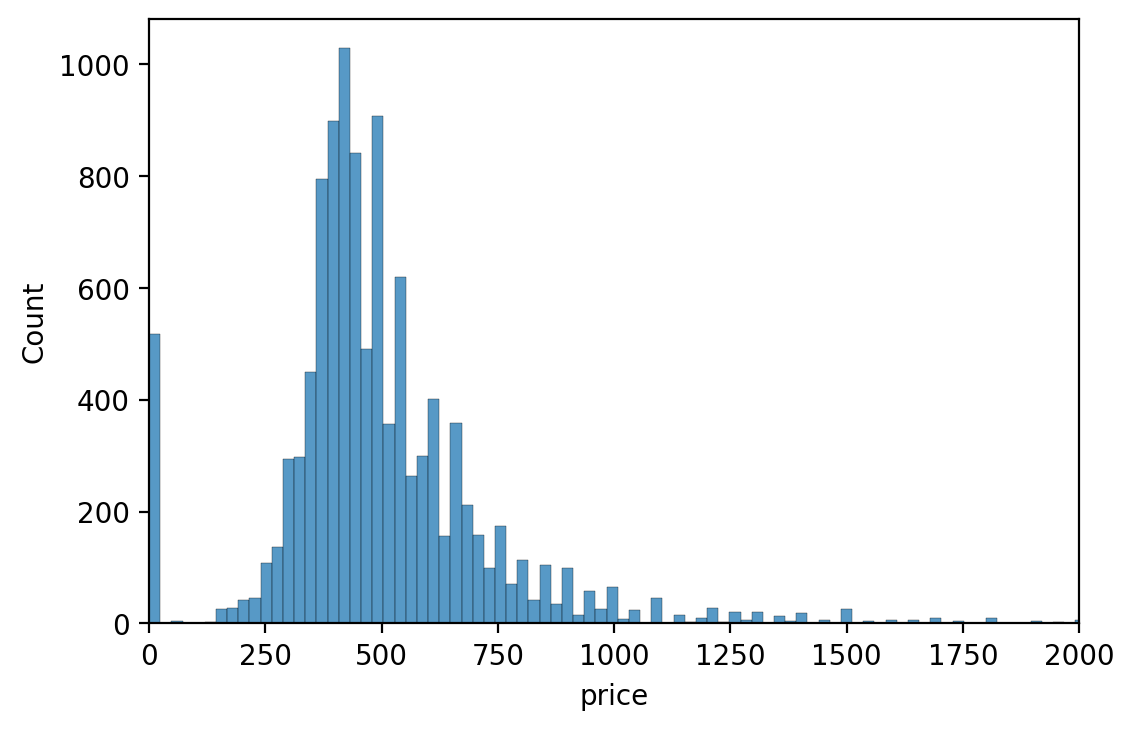

In [40]:
import seaborn as sns

# alot of properties at $0 a week
sns.histplot(df['price'], bins=250)
plt.xlim(0, 2000)

(0.0, 2000.0)

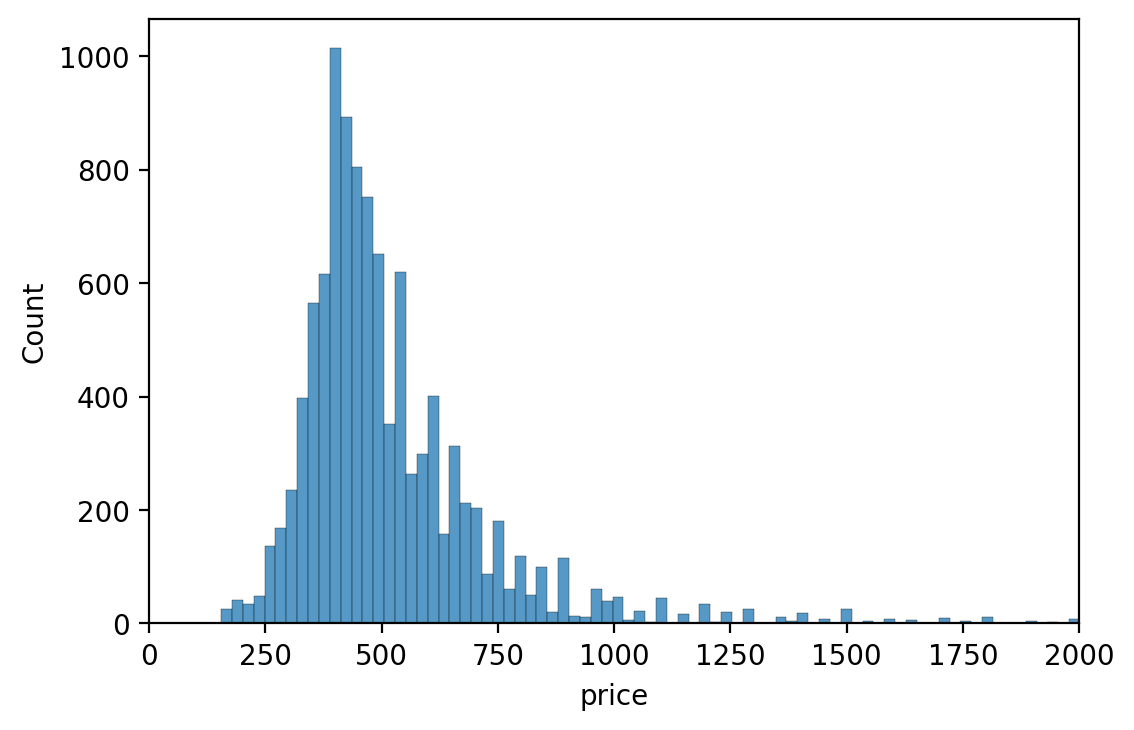

In [39]:
df_dropped = df[df['price'] > 150]
df_dropped = df[df['price'] < 2000]

#
sns.histplot(df_dropped['price'], bins=250)
plt.xlim(0, 2000)

In [36]:
df_dropped.to_csv('../data/curated/listings.csv',index=False)